### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดชื่อไฟล์ Excel
file_path = '1.xlsx'

# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel(file_path)

# แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
df['date'] = pd.to_datetime(df['date'])

# กำหนด 'date' เป็น index
df.set_index('date', inplace=True)


### d2m

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\brown\\lib\\site-packages\\matplotlib\\pyplot.py'>

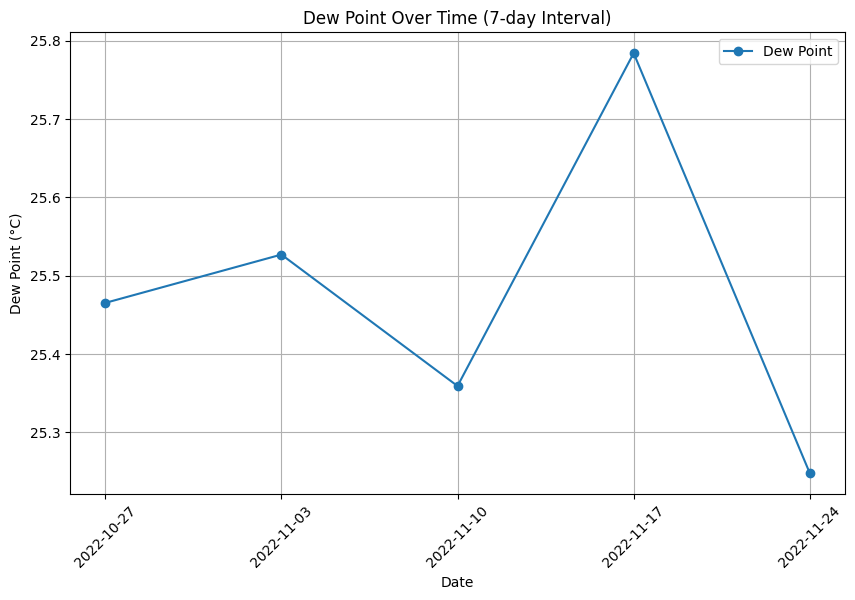

In [2]:
# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').mean() 

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# # ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))

# # พล็อตกราฟจุดน้ำค้าง
plt.plot(df_resampled.index, df_resampled['d2m'], label='Dew Point', marker='o')

# ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
plt.xticks(df_resampled.index)


# ปรับแต่งกราฟ
plt.title('Dew Point Over Time (7-day Interval)')
plt.xlabel('Date')
plt.ylabel('Dew Point (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
# บันทึกภาพเป็นไฟล์ PNG
plt.savefig('d2m.png', bbox_inches='tight')
plt


### RH

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\brown\\lib\\site-packages\\matplotlib\\pyplot.py'>

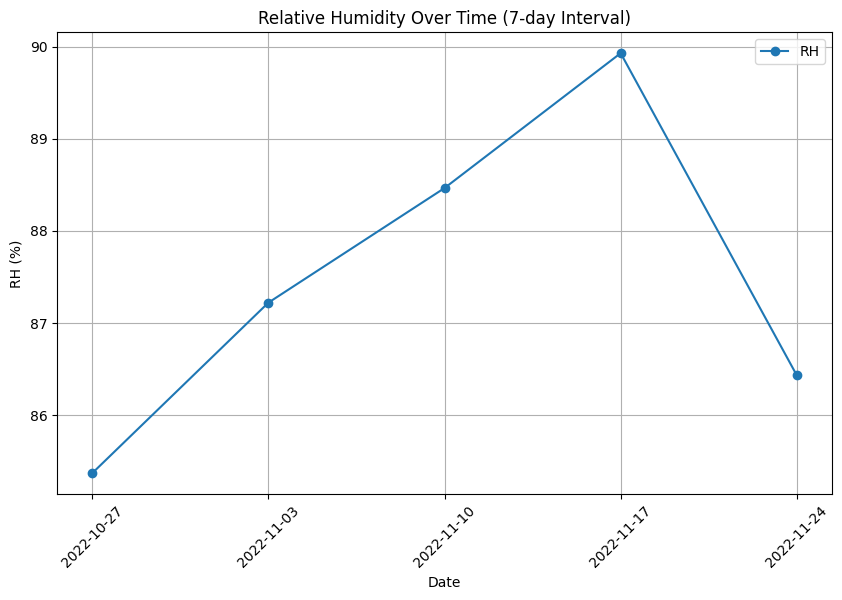

In [3]:
# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').mean()

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# # ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))

# พล็อตกราฟความชื้น
plt.plot(df_resampled.index, df_resampled['RH']*100, label='RH', marker='o')

# ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
plt.xticks(df_resampled.index)

# ปรับแต่งกราฟ
plt.title('Relative Humidity Over Time (7-day Interval)')
plt.xlabel('Date')
plt.ylabel('RH (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
# บันทึกภาพเป็นไฟล์ PNG
plt.savefig('RH.png', bbox_inches='tight')
plt

### temp

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\brown\\lib\\site-packages\\matplotlib\\pyplot.py'>

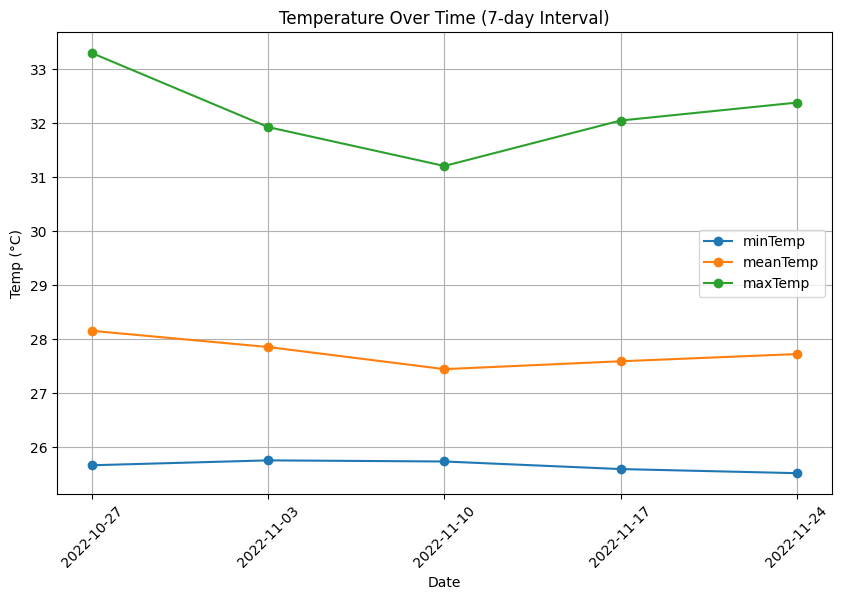

In [4]:
# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').agg({'minTemp': 'min', 'maxTemp': 'max', 'meanTemp': 'mean'})

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# # ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))

# พล็อตกราฟอุณหภูมิ
plt.plot(df_resampled.index, df_resampled['minTemp'], label='minTemp', marker='o')
plt.plot(df_resampled.index, df_resampled['meanTemp'], label='meanTemp', marker='o')
plt.plot(df_resampled.index, df_resampled['maxTemp'], label='maxTemp', marker='o')

# ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
plt.xticks(df_resampled.index)

# ปรับแต่งกราฟ
plt.title('Temperature Over Time (7-day Interval)')
plt.xlabel('Date')
plt.ylabel('Temp (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
# บันทึกภาพเป็นไฟล์ PNG
plt.savefig('temp2.png', bbox_inches='tight')
plt


### RainFall

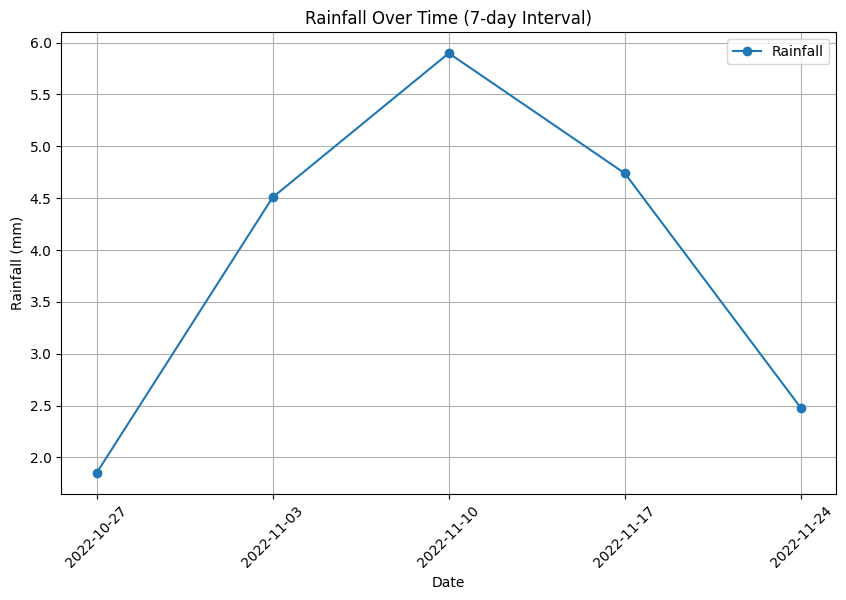

In [5]:

# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').sum() 

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# # ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# Plot the graph
plt.figure(figsize=(10, 6))

plt.plot(df_resampled.index, df_resampled['tp']*1000, label='Rainfall', marker='o')

# ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
plt.xticks(df_resampled.index)

plt.title('Rainfall Over Time (7-day Interval)')  # Corrected title
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')  # Adjusted unit to millimeters
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Cumulative_Rainfall.png', bbox_inches='tight')
plt.show()

### WS

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\brown\\lib\\site-packages\\matplotlib\\pyplot.py'>

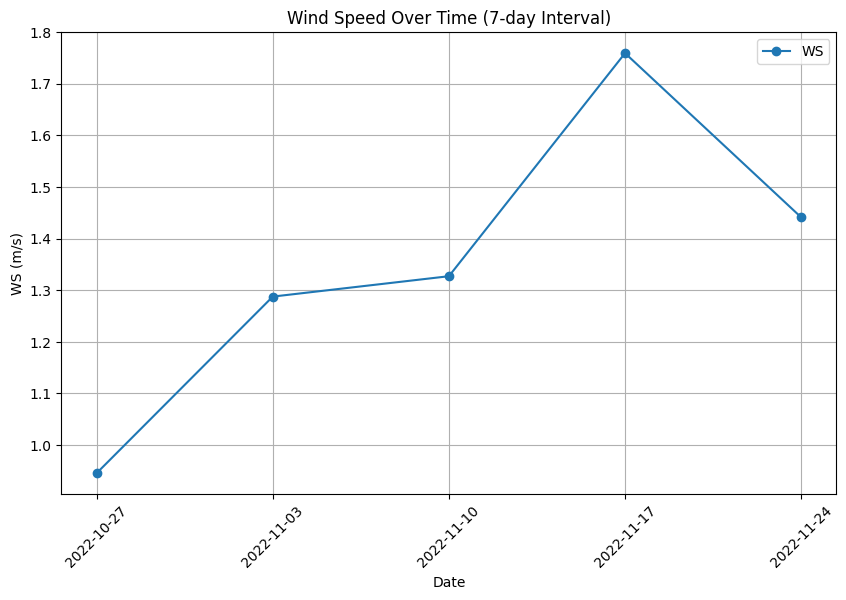

In [6]:
# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').mean() 

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# # ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))

# พล็อตกราฟลม
plt.plot(df_resampled.index, df_resampled['WS'], label='WS', marker='o')

# ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
plt.xticks(df_resampled.index)

# ปรับแต่งกราฟ
plt.title('Wind Speed Over Time (7-day Interval)')
plt.xlabel('Date')
plt.ylabel('WS (m/s)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
# บันทึกภาพเป็นไฟล์ PNG
plt.savefig('WS.png', bbox_inches='tight')
plt
